**Download** **Dataset**

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!unzip kagglecatsanddogs_3367a.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/5523.jpg  

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Check** **Empty** **Images**

In [0]:
import cv2
import os
for i in os.listdir('/content/PetImages/Cat'):
  img=cv2.imread('/content/PetImages/Cat/'+i)
  if  img is  None:
    os.remove('/content/PetImages/Cat/'+i)
    
for i in os.listdir('/content/PetImages/Dog'):
  img=cv2.imread('/content/PetImages/Dog/'+i)
  if  img is  None:
    os.remove('/content/PetImages/Dog/'+i)    

**Load** **Images** **To** **Local** **Colab**

In [0]:
import random 
import cv2
os.mkdir('Test')
os.mkdir('/content/Test/Dog')
os.mkdir('/content/Test/Cat')
Cat_path="/content/PetImages/Cat"
Dog_path="/content/PetImages/Dog"
test_number=7500
for i in range(test_number//2):
  files=os.listdir(Cat_path)
  img=random.choice(files)
  image=cv2.imread(Cat_path+'/'+img)
  cv2.imwrite('/content/Test/Cat/'+img,image)
for i in range(test_number//2):
  files=os.listdir(Dog_path)
  img=random.choice(files)
  image=cv2.imread(Dog_path+'/'+img)
  cv2.imwrite('/content/Test/Dog/'+img,image)  

In [5]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense ,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
train_data_dir = "/content/PetImages"
validation_data_dir = '/content/Test'
rows,cols=200,200
input_shape = (rows, cols, 3)
img_width = rows
img_height = cols
epochs = 100
batch_size=32
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations
      width_shift_range = 0.3,       # randomly applies width shifting
      height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = True,        # randonly flips the image
      fill_mode = 'nearest')  
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = True)
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'categorical',
        shuffle = False) 

Using TensorFlow backend.


Found 24946 images belonging to 2 classes.
Found 6505 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)            

In [8]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/gdrive/My Drive/c_d1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=2)
earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 2,
                          restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 2,
                              min_delta = 0.00001)
callbacks = [checkpoint]
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss = 'binary_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])
nb_train_samples = 24946 
nb_validation_samples = 6505  
epochs = 20
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    verbose = 1,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/20
765/779 [============================>.] - ETA: 5s - loss: 0.6205 - accuracy: 0.6533

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

779/779 [==============================] - 313s 402ms/step - loss: 0.6202 - accuracy: 0.6535 - val_loss: 0.4647 - val_accuracy: 0.7231

Epoch 00001: val_loss improved from inf to 0.46474, saving model to /content/gdrive/My Drive/c_d1.h5
Epoch 2/20
779/779 [==============================] - 313s 401ms/step - loss: 0.5722 - accuracy: 0.7006 - val_loss: 0.3549 - val_accuracy: 0.7736

Epoch 00002: val_loss improved from 0.46474 to 0.35494, saving model to /content/gdrive/My Drive/c_d1.h5
Epoch 3/20
779/779 [==============================] - 311s 399ms/step - loss: 0.5467 - accuracy: 0.7220 - val_loss: 0.3283 - val_accuracy: 0.7665

Epoch 00003: val_loss improved from 0.35494 to 0.32830, saving model to /content/gdrive/My Drive/c_d1.h5
Epoch 4/20
779/779 [==============================] - 311s 399ms/step - loss: 0.5195 - accuracy: 0.7405 - val_loss: 0.4206 - val_accuracy: 0.7916

Epoch 00004: val_loss did not improve from 0.32830
Epoch 5/20
779/779 [==============================] - 308s 39

In [51]:
import matplotlib.pyplot as plt
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
class_labels

{0: 'Cat', 1: 'Dog'}

In [0]:
from google.colab.patches import cv2_imshow
def load_image(cat_or_dog):
  if cat_or_dog==0:
     pa='/content/Test/Cat'
  else:
    pa='/content/Test/Dog'
  files=os.listdir(pa)
  img=random.choice(files)
  image=cv2.imread(pa+'/'+img)
  image=cv2.resize(image,(200,200))
  res = str(model.predict_classes(image.reshape(1,200,200,3))[0])
  expanded_image = cv2.copyMakeBorder(image, 0, 0, 0, image.shape[0]*2 ,cv2.BORDER_CONSTANT,value=(0,0,0))
  pred=0
  if res=='0':
    pred='Cat'
  else:
    pred='Dog'  
  cv2.putText(expanded_image, str(pred), (200, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
  return expanded_image

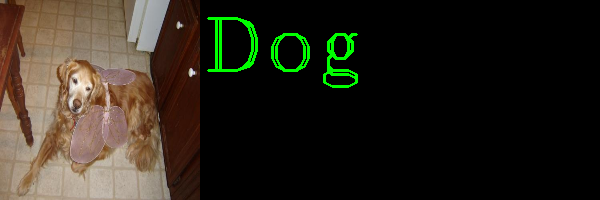

In [50]:
cv2_imshow(load_image(1))